In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import matplotlib.ticker as ticker

In [2]:
target_file = 'spectra_plot.csv' 
data = pd.read_csv(target_file, header = 0, index_col = 0) # load data
data = data.sort_values(by=['ages'], ascending=True) # sort by age
#data = data[1:] # select all data w/ index >=1
ages = np.array(data.index.astype(float)) # extract nm from index # extract ages
ages = np.round(ages, 2)
data = data.T
nm = np.array(data.index.astype(float))

data = data.T
bad_bands_idx = np.r_[2121:2151] # 1 to 2151, not 350 - 2500
data.iloc[:,bad_bands_idx] = 0 # band bands as 0 for PCA

data.head()

,350,351,352,353,354,355,356,357,358,359,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
ages,,,,,,,,,,,,,,,,,,,,,
0.00,0.117401,0.113445,0.112613,0.110319,0.107986,0.109687,0.109817,0.108712,0.108176,0.109857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00,0.111685,0.106869,0.108442,0.107639,0.105162,0.105856,0.105100,0.103672,0.103445,0.104929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.00,0.111811,0.113693,0.107930,0.107727,0.110561,0.106333,0.108159,0.111718,0.110295,0.110333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.11,0.110010,0.103387,0.100363,0.101270,0.103217,0.100834,0.100067,0.099572,0.097241,0.098291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.11,0.099897,0.101718,0.095666,0.095585,0.099088,0.096008,0.097494,0.100103,0.098456,0.097983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


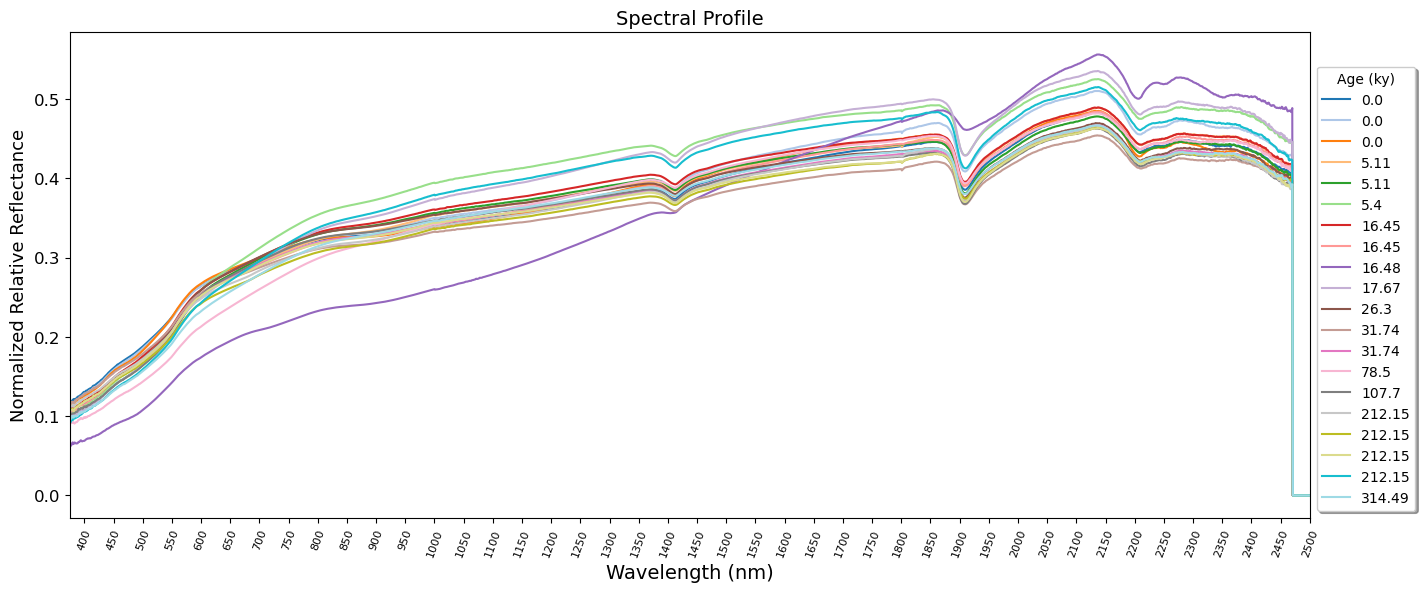

In [7]:
#plot
target_x = nm
target_y = data
target_names = ages

N = len(target_y) - 1 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,7] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(target_x, target_y.iloc[i], label = target_names[i]) # for i in range of objects, plot x,y

#axes
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xlabel('Wavelength (nm)', fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylabel('Normalized Relative Reflectance', fontsize = 13)
plt.title("Spectral Profile", size = 14)
plt.title
plt.xlim(375,2500)

# legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * .9])

ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1, title = 'Age (ky)') # Put a legend below current axis

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

In [71]:
n_modes = np.min(np.shape(data)) 
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

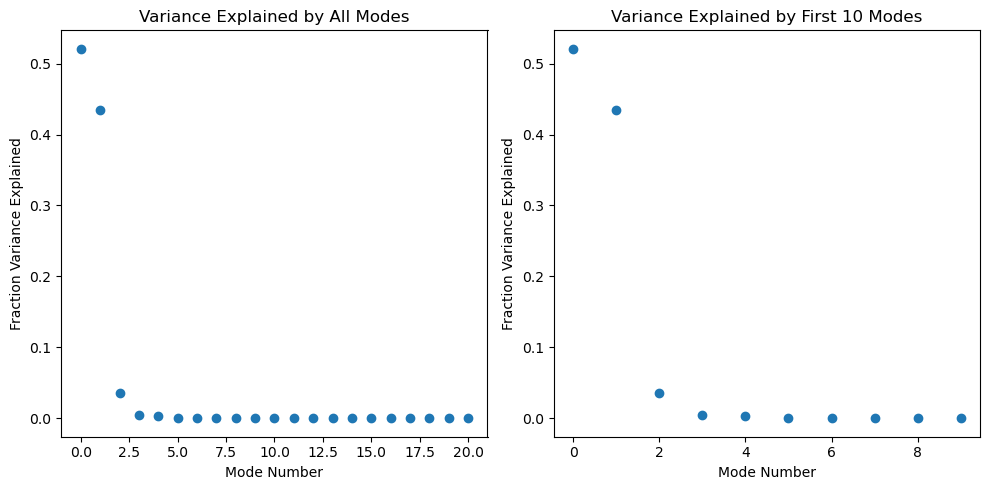

0.5209149221572169

In [72]:
# plot fraction of variance explained by each mode
# pull out ages as array

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

var_exp = fracVar[0] #+ fracVar[1] + fracVar[2] + fracVar[3]
var_exp

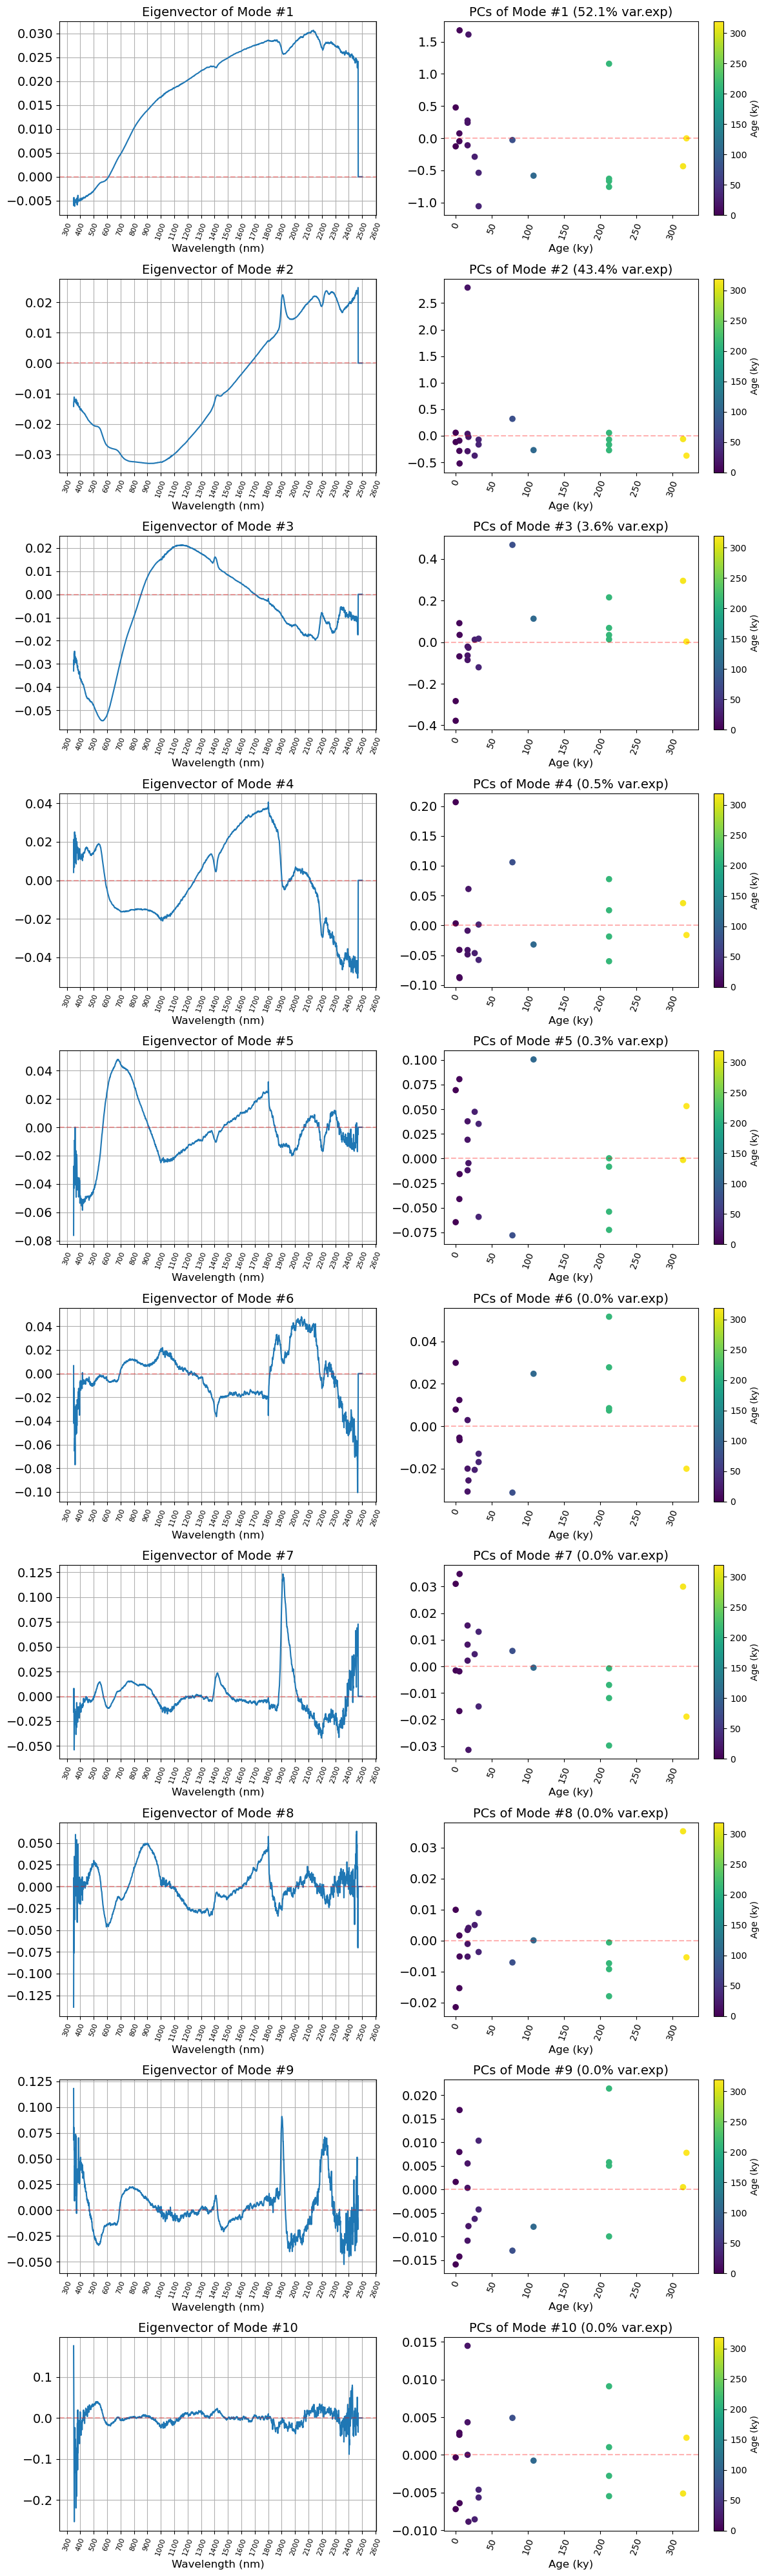

In [73]:
n = 10

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    ax = plt.subplot(n,2,kk*2+1)
    plt.plot(nm, eigvecs[kk,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 14)
    plt.xlabel('Wavelength (nm)', fontsize = 12)
    plt.xticks(fontsize = 10, rotation=70, size = 8)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
    plt.yticks(fontsize = 14)
    plt.axhline(y=0.0, color='r', linestyle='--', alpha = 0.3)
    plt.grid()
    
    plt.subplot(n,2,(kk+1)*2)
    #plt.plot(ages[1:],PCs[:,kk][1:], color = 'black')
    #plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
    #plt.plot(ages_proxy, ice_proxy['dO18'], color = 'red', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
    plt.scatter(ages[1:],PCs[:,kk][1:], c = ages[1:])
    plt.colorbar(label = 'Age (ky)')
    plt.title('PCs of Mode #' + str(kk+1) + ' ({}% var.exp)'.format(round(fracVar[kk]*100,1)), fontsize = 14)
    plt.xlabel('Age (ky)', fontsize = 12)
    plt.xticks(fontsize = 14, rotation=70, size = 10)
    plt.yticks(fontsize = 14)  
    plt.tight_layout()
    plt.xlim()
    plt.axhline(y=0.0, color='r', linestyle='--', alpha = 0.3)
    
plt.show()

# yonger fan variation may be due to water on the fans, which effects the signal. Drier fans
# color by location
# invesitgate the PC1, for its age. 

In [133]:
## TARGET PC ##
target_PC = 2
target_PC = PCs[:,target_PC]
target_PC = target_PC

PC0 = PCs[:,0]
PC1 = PCs[:,1]
PC2 = PCs[:,2]
PC3 = PCs[:,3]
PC4 = PCs[:,4]

#target_PC =PC0 + PC1 /2

(-15.961000000000002, 335.18100000000004)

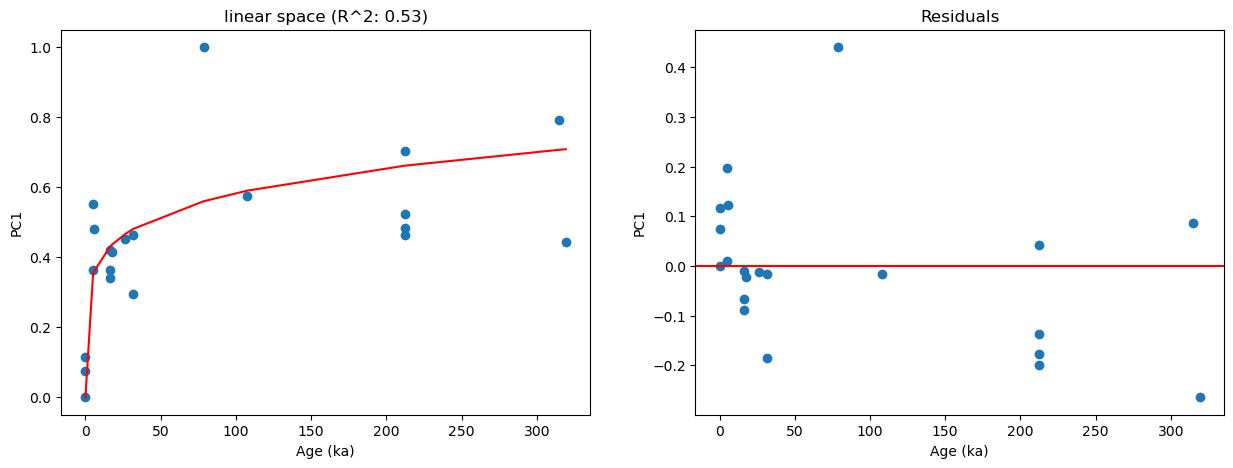

In [134]:
# Fit Power law function and take resiudals (without 0)
# take ln of x and y, run linear regression, plot and unpack
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# define steady weathering rate of granites (White and Brandtly, 2001)
def weathering_rate(time):
    #a = 3.31e-13 # white 2001
    #b = 0.61 # white 2001
    a = 0.2691 # nui et al. 2019
    b = 0.1679 # nui et al. 2018
    #a = 0.59 # constant D'arcy
    #b = 0.16 # exponent D'arcy
    rate = a*(time**b)
    return(rate)

PC1_posative = (target_PC-min(target_PC))/(max(target_PC)-min(target_PC))

wr = weathering_rate(ages)
#PC1_posative = target_PC  - target_PC.min()
residuals = PC1_posative - wr

# correlation coefficient (r^2)
r2 = r2_score(PC1_posative, wr)
r2 = round(r2,2)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(ages, PC1_posative)
plt.plot(ages, wr, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('linear space (R^2: {})'.format(r2))
#plt.xscale('log')
#plt.yscale('log')


plt.subplot(1,2,2)
plt.scatter(ages, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

plt.xlim()

In [89]:
len(X)

2151

linear: y=0.0x+[[0.09]]
Power funtion: y = 1.0x^[[0.09]]


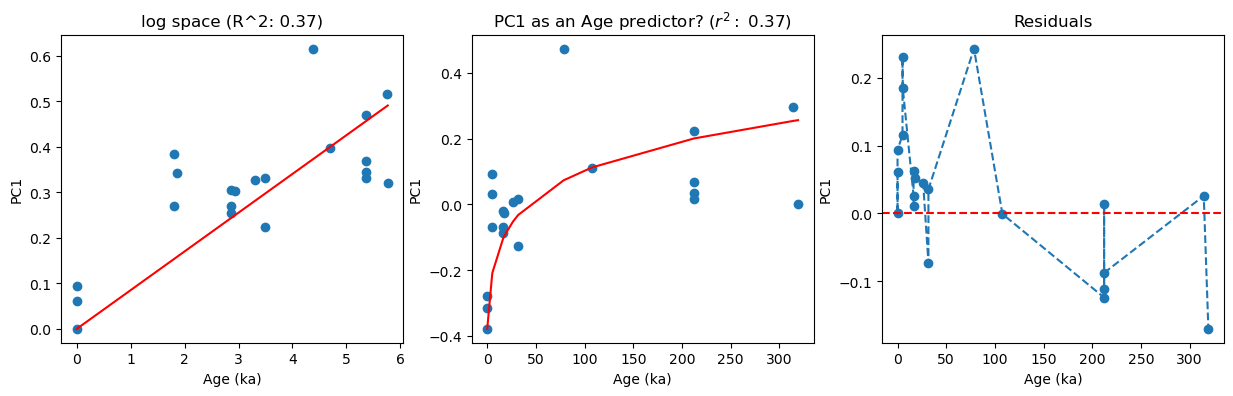

In [135]:
# Fit Power law function and take resiudals (without 0)
# take ln of x and y, run linear regression, plot and unpack
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# data
PC1 = target_PC
PC1_posative = (PC1 - PC1.min()) + 1 # scale PC1 to remove negatives, and add 1 to compute log(0) as 0

ages_log = ages + 1   # add 1 to compute log(0) as 0

# take natural log
ages_log = np.log(ages_log) 
PC1_log = np.log(PC1_posative)

# run linear regression
X = ages_log.reshape(-1,1) # values converts it into a numpy array
Y = PC1_log.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(fit_intercept=False)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make Y predictions from regression line

# calculate residuals
residuals = Y - Y_pred
residuals = residuals.reshape(1,-1)
residuals = residuals[0]

# unpack from log-log into linear space, as origionally scaled 
Y_pred_unpacked = (np.exp(Y_pred))
Y_pred_unpacked = Y_pred_unpacked - 1
Y_pred_unpacked = Y_pred_unpacked + PC1.min()

Y_unpacked = (np.exp(Y))
Y_unpacked = Y_unpacked - 1
Y_unpacked = Y_unpacked + PC1.min()

X_unpacked = (np.exp(X)) - 1

# correlation coefficient (r^2)
r2 = r2_score(Y, Y_pred)
r2 = round(r2,2)

#rho, p = spearmanr(Y, Y_pred)
#spearmans_r2 = rho**2

# plot results
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('log space (R^2: {})'.format(r2))

plt.subplot(1,3,2)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1 as an Age predictor? ($r^2:$ {})'.format(r2))


plt.subplot(1,3,3)
plt.scatter(X_unpacked, residuals)
plt.plot(X_unpacked, residuals, linestyle = '--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

# Equations
B = np.round(linear_regressor.coef_,2)
A = np.round(linear_regressor.intercept_,2)
A_pl = np.round(np.exp(A),2)
print('linear: y={}x+{}'.format(A,B))
print('Power funtion: y = {}x^{}'.format(A_pl,B))

Text(0.5, 1.0, 'Residuals')

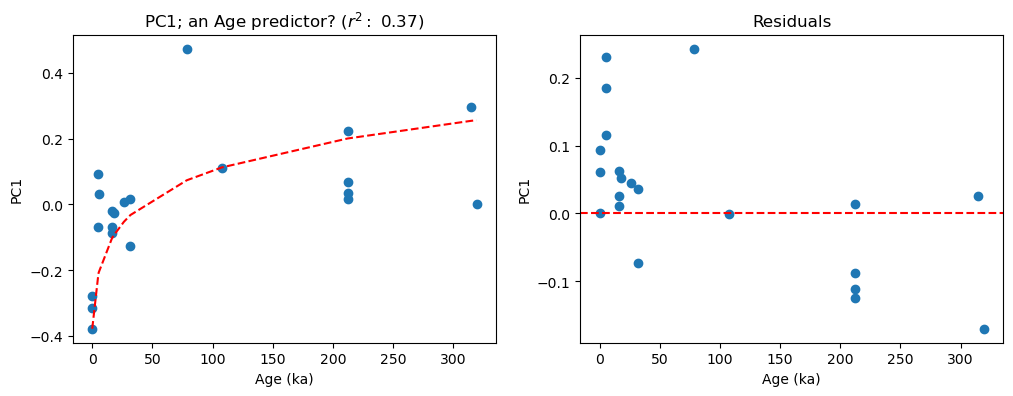

In [136]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1; an Age predictor? ($r^2:$ {})'.format(r2))

plt.subplot(1,2,2)
plt.scatter(X_unpacked, residuals)
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

In [176]:
# long term dO18 record
# import data
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# prep data
O18_global = pd.read_csv('O18_global_karner2002.csv', header = 0)
O18_global = O18_global.rename(columns={O18_global.columns[0]: "age", O18_global.columns[1]: 'dO18'})
O18_global = O18_global.replace({999:np.NaN})

#O18_global = O18_global.reset_index(drop = True) # reset row index
#O18_global['dO18'] = O18_global['dO18'] * -1 # inverse the data 

ages_fans = ages[ages > 0] # fans with ages > 0 

ice_proxy = O18_global.loc[O18_global['age'] >= ages_fans.min()] # paleo data with ages > 0 
ice_proxy = ice_proxy.loc[ice_proxy['age'] <= max(ages_fans)] # paleo data with ages < max age chosen
ages_proxy = ice_proxy['age']

fans = residuals [3:]
#fans = target_PC[3:]

# normalize each dataset
ice_proxy['dO18'] = (ice_proxy['dO18'] - ice_proxy['dO18'].mean())/ice_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()

Text(0.5, 1.0, 'Global Paleoclimate: Global Temperature ($r^2 = $ 0.0)')

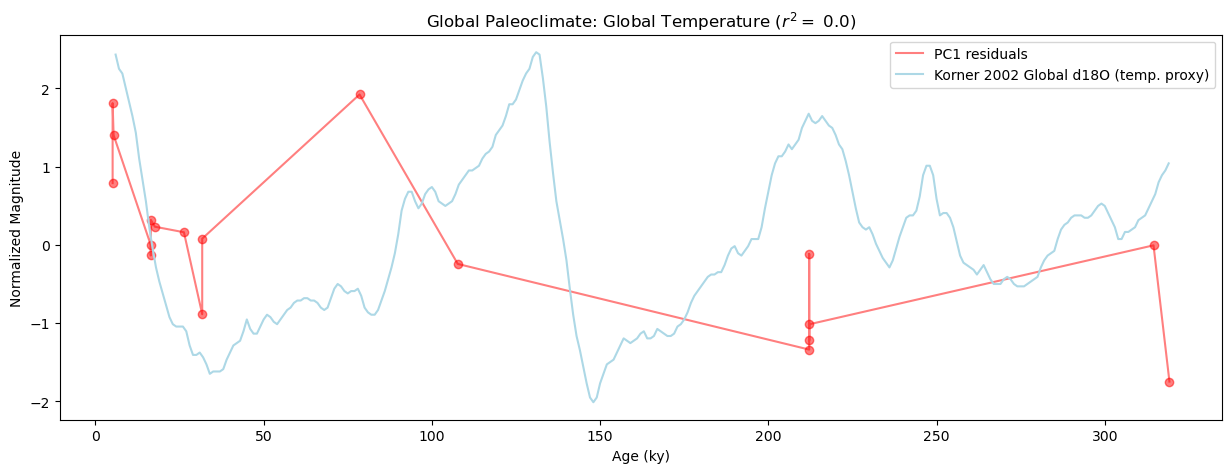

In [177]:
# Plot
fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 1
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['dO18'].max() - ice_proxy['dO18'].min())/len(ice_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)

plt.figure(figsize = (15,5))
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(yrs_per_window)) 
plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized Magnitude')
plt.legend()
plt.xlim()

# correlation coefficient (r --> r^2)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # interpret y values at given x (same shape for r^2)
fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value
#x_values = fans_pts[30:]
#y_values = ice_proxy_avg[30:]
x_values = fans
y_values = ice_proxy_pts
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
rho, p = spearmanr(x_values, y_values)

plt.title('Global Paleoclimate: Global Temperature ($r^2 = $ {})'.format(round(r_squared,2)))

In [178]:
# Prepare and trim data to ~LGM
# O18 proxy plot
O18 = pd.read_csv('O18_Wang_etal_2007.csv', header = 0)
O18 = O18.rename(columns={'Age (ky B.P.)': "age", 'd18O (per mil, VPDB)': "dO18"})
O18['dO18'] = O18['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)
O18.head()

max_age = 110  # Ka

ages_fans_precip = ages [ages > 0] # fans with ages > 0 
ages_fans_precip = ages_fans_precip[ages_fans_precip <= max_age] # fans with ages < max age chosen

precip_proxy = O18.loc[O18['age'] >= ages_fans_precip.min()] # paleo data with ages > 0 
precip_proxy = precip_proxy.loc[precip_proxy['age'] <= max_age] # paleo data with ages < max age chosen
ages_precip_proxy = precip_proxy['age']

#fans_precip = residuals[3:len(ages_fans_precip)+ 3]
fans_precip = target_PC[3:len(ages_fans_precip)+ 3]

# normalize each dataset
precip_proxy['dO18'] = (precip_proxy['dO18'] - precip_proxy['dO18'].mean())/precip_proxy['dO18'].std()
fans_precip = (fans_precip - fans_precip.mean())/fans_precip.std()


#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy['dO18']) # extract proxy points for every age value 
#fans_pts = np.interp(ages_proxy, ages_fans_precip, fans) # extract points for every proxy value

Text(0.5, 1.0, 'Regional Paleoclimate (precipitation): ($r^2 = $ 0.09)')

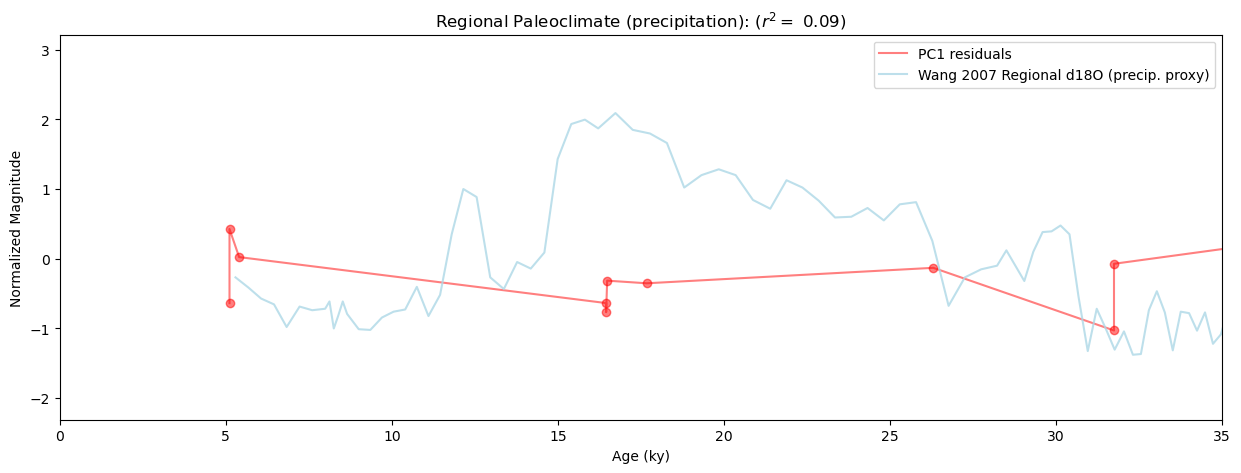

In [179]:
# plot paleoclimate data against PC1
# add moving average, a window of 1 is none

window = 1
precip_proxy_avg = movingaverage(precip_proxy['dO18'], window) 
yrs_per_window = (precip_proxy['dO18'].max() - precip_proxy['dO18'].min())/len(precip_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy_avg) # extract proxy points for every age value 

fans_precip_avg = movingaverage(fans_precip, 1) 
fans_precip_pts = np.interp(ages_proxy, ages_fans_precip, fans_precip)

# Plot
plt.figure(figsize = (15,5))
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
#plt.plot(ages_proxy, precip_proxy_avg, color = 'blue', alpha = .4 ,label = 'Wang 2007 Regional d18O (precip. proxy)'.format(yrs_per_window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy', size = 12)
plt.xlabel('Age (ky)', size = 10)
plt.ylabel('Normalized Magnitude', size = 10)
plt.legend()
plt.xlim(0,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
rho, p = spearmanr(x_values, y_values)

plt.title('Regional Paleoclimate (precipitation): ($r^2 = $ {})'.format(round(r_squared,2)))

Text(0.5, 1.0, 'Regional Paleoclimate after LGM: r^2 = 0.09')

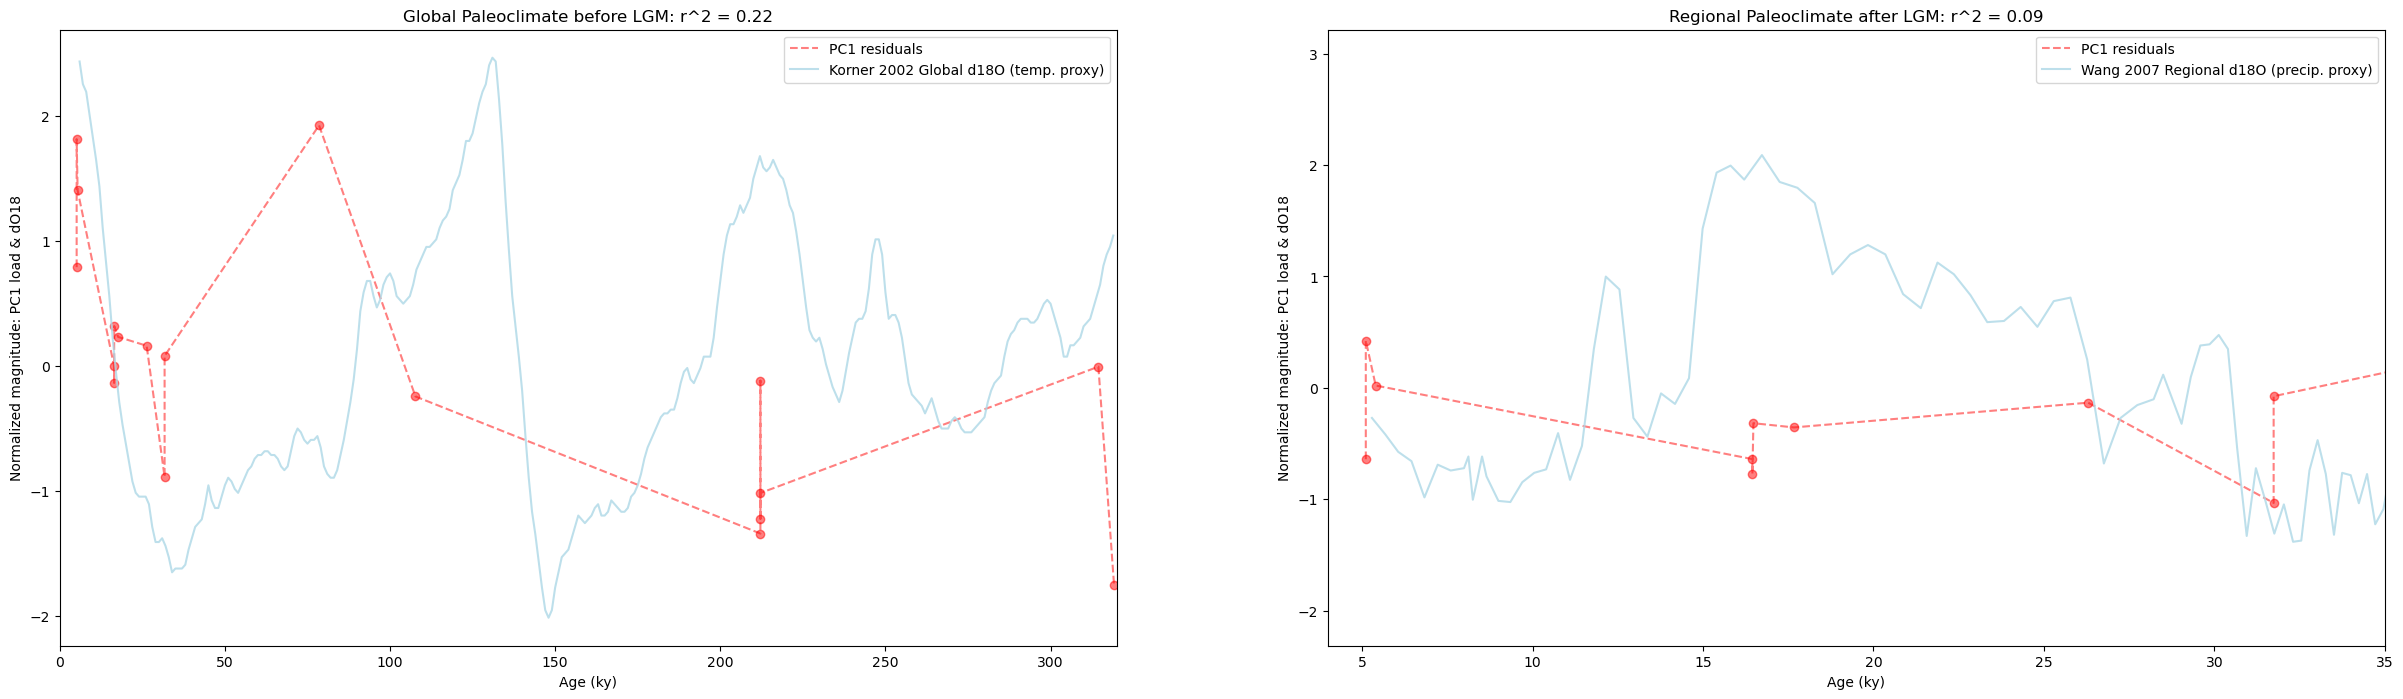

In [182]:
## PLOT ##

# global proxy
#fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 70
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['age'].max() - ice_proxy['age'].min())/len(ice_proxy['age'])
yrs_per_window = round(yrs_per_window * window, 1)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # interpret y values at given x (same shape for r^2)

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans, color = 'red', alpha = 0.5, label = 'PC1 residuals', linestyle = '--')
plt.plot(ages_proxy, ice_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'blue', alpha = .4 ,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(0, 320)

# correlation coefficient (r --> r^2)
x_values = fans
x_values = x_values.reshape(1,-1)
y_values = ice_proxy_pts

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Global Paleoclimate before LGM: r^2 = {}'.format(round(r_squared,2)))

#plot regonal
plt.subplot(1,2,2)
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, linestyle = '--', label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(4,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Regional Paleoclimate after LGM: r^2 = {}'.format(round(r_squared,2)))
